In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import requests
from pattern import web

In [2]:
url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
website_html = requests.get(url).text
#print website_html

In [3]:
print website_html

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of countries by past and future population - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_past_and_future_population","wgTitle":"List of countries by past and future population","wgCurRevisionId":817629988,"wgRevisionId":817629988,"wgArticleId":20928488,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","All articles with dead external links","Articles with dead external links from December 2017","Articles with permanently dead external links","Webarchive template archiveis links","Lists o

In [4]:
def get_population_html_tables(html):
    """Parse html and return html tables of wikipedia population data."""

    dom = web.Element(html)
    
    ### 0. step: look at html source!
    
    #### 1. step: get all tables

    #### 2. step: get all tables we care about
    tbls = dom.by_class('sortable wikitable')
    return tbls

tables = get_population_html_tables(website_html)
print "table length: %d" %len(tables)
for t in tables:
    print t
    #print t.attributes

table length: 3
<table class="sortable wikitable" style="text-align: right">
<tr>
<th>Country (or dependent territory)</th>
<th>1950</th>
<th>1955</th>
<th>%</th>
<th>1960</th>
<th>%</th>
<th>1965</th>
<th>%</th>
<th>1970</th>
<th>%</th>
<th>1975</th>
<th>%</th>
<th>1980</th>
<th>%</th>
</tr>
<tr>
<td align="left"><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/23px-Flag_of_Afghanistan.svg.png" width="23" height="15" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/35px-Flag_of_Afghanistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/45px-Flag_of_Afghanistan.svg.png 2x" data-file-width="450" data-file-height="300" />&#160;</span><a href="/wiki/Afghanistan" title="Afghanistan">Afghanistan</a></td>
<td>8,151</td>
<td>8,892</td>
<td>1.76</td>
<td>9,830</td>
<td>2.03</td>
<td>10,998</td>
<td>2.27</td>
<td>12,431</td>
<td>2.4

In [5]:
for t in tables:
    print t
    print t.attributes

<table class="sortable wikitable" style="text-align: right">
<tr>
<th>Country (or dependent territory)</th>
<th>1950</th>
<th>1955</th>
<th>%</th>
<th>1960</th>
<th>%</th>
<th>1965</th>
<th>%</th>
<th>1970</th>
<th>%</th>
<th>1975</th>
<th>%</th>
<th>1980</th>
<th>%</th>
</tr>
<tr>
<td align="left"><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/23px-Flag_of_Afghanistan.svg.png" width="23" height="15" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/35px-Flag_of_Afghanistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/45px-Flag_of_Afghanistan.svg.png 2x" data-file-width="450" data-file-height="300" />&#160;</span><a href="/wiki/Afghanistan" title="Afghanistan">Afghanistan</a></td>
<td>8,151</td>
<td>8,892</td>
<td>1.76</td>
<td>9,830</td>
<td>2.03</td>
<td>10,998</td>
<td>2.27</td>
<td>12,431</td>
<td>2.48</td>
<td>14,13

In [6]:
def table_type(tbl):
    ### Extract the table type
    #print tbl('th')[1].content
    
    #this conforms to saved html file, they changed the webpage
    return tbl('th')[0].content
    
    #return tbl('th')[1].content
    
#   for tb in tbl('th'):
#       print tb.content
#   print thl   
#   return 'table'

# group the tables by type
# https://docs.python.org/2/library/collections.html#collections.defaultdict
tables_by_type = defaultdict(list)  

# if we dont use defaultdict then we need write following code
#for tbl in tables:
#    typ = table_type(tbl)
#    if typ in tables_by_type:
#        tables_by_type[typ].append(tbl)
#    else:
#        tables_by_type[typ] = tbl


for tbl in tables:
    tables_by_type[table_type(tbl)].append(tbl)

print tables_by_type
# This conforms to saved html file
# print tables_by_type['Country or territory']

#print tables_by_type['Country (or dependent territory)']

defaultdict(<type 'list'>, {u'Country (or dependent territory)': [Element(tag=u'table'), Element(tag=u'table'), Element(tag=u'table')]})


In [7]:
def get_countries_population(tables):
    """Extract population data for countries from all tables and store it in dictionary."""
    
    result = defaultdict(dict)

    # 1. step: try to extract data for a single table
    for tbl in tables:
        #tbl = tables[0]
        #print tbl
        headers = tbl('tr')
        #print headers
        first_header = headers[0]
        th_s = first_header('th')
        #print th_s
        
        years = [int(val.content) for val in th_s if val.content.isnumeric()]
        
        year_indices = [idx for idx, val in enumerate(th_s) if val.content.isnumeric()]
        #print years
        #print year_indices
        # 2. step: iterate over all tables, extract headings and actual data and combine data into single dict
        rows = tbl('tr')[1:]
        #print rows[0]
        
        # this conforms to saved html file, they changed teh webpage
        # for row in rows:
        # the row = rows[i] is not needed for saved html file
        
        for i in range(0, len(rows) - 1):
            row = rows[i]
            #print row
            tds = row('td')
            
            country_name = tds[0]('a')[0].content
            #print country_name
            population_by_year = [int(tds[colindex].content.replace(',', '')) for colindex in year_indices]
            #print country_name, population_by_year
            subdict = dict(zip(years, population_by_year))
            result[country_name].update(subdict)
    
    return result

# this is matching saved html file, it changed due to change to webpage
#result = get_countries_population(tables_by_type['Country or territory'])

result = get_countries_population(tables_by_type['Country (or dependent territory)'])
print result

defaultdict(<type 'dict'>, {u'Canada': {1985: 25942, 2050: 41136, 1955: 16051, 2020: 36388, 1990: 27791, 1960: 18267, 2025: 37559, 1995: 29691, 1965: 20072, 2030: 38565, 2000: 31100, 1970: 21750, 2035: 39396, 2005: 32387, 1975: 23210, 2040: 40071, 2010: 33760, 1980: 24594, 2045: 40636, 1950: 14012, 2015: 35100}, u'Saint Martin': {1985: 16, 2050: 35, 1955: 4, 2020: 33, 1990: 31, 1960: 5, 2025: 34, 1995: 33, 1965: 5, 2030: 34, 2000: 29, 1970: 6, 2035: 34, 2005: 28, 1975: 7, 2040: 35, 2010: 31, 1980: 8, 2045: 35, 1950: 3, 2015: 32}, u'Guernsey': {1985: 56, 2050: 67, 1955: 47, 2020: 68, 1990: 63, 1960: 47, 2025: 68, 1995: 61, 1965: 51, 2030: 69, 2000: 62, 1970: 54, 2035: 68, 2005: 64, 1975: 54, 2040: 68, 2010: 65, 1980: 54, 2045: 68, 1950: 46, 2015: 67}, u'Lithuania': {1985: 3588, 2050: 1802, 1955: 2615, 2020: 2732, 1990: 3684, 1960: 2765, 2025: 2574, 1995: 3510, 1965: 2960, 2030: 2413, 2000: 3490, 1970: 3138, 2035: 2253, 2005: 3327, 1975: 3306, 2040: 2099, 2010: 3089, 1980: 3436, 2045: 19

IndexError: list index out of range

In [8]:
# create dataframe

# orient index means top level keys used for row labels
# in panda index means rows
df = pd.DataFrame.from_dict(result, orient='index')
# sort based on year
df.sort_index(axis=1,inplace=True)
#print df.to_html() will print everything in html format
# look at panda printin settings and possibly way to print all
print df

                                1950    1955    1960    1965    1970    1975  \
Afghanistan                     8151    8892    9830   10998   12431   14133   
Albania                         1228    1393    1624    1884    2157    2402   
Algeria                         8893    9842   10910   11964   13932   16141   
American Samoa                    20      20      21      25      28      30   
Andorra                            7       7       9      14      20      27   
Angola                          4118    4424    4798    5135    5606    6051   
Anguilla                           6       6       6       6       7       7   
Antigua and Barbuda               46      52      55      60      66      69   
Argentina                      17151   18928   20617   22284   23963   26082   
Armenia                         1356    1566    1869    2206    2520    2835   
Aruba                             50      54      58      60      60      60   
Australia                       8268    

In [9]:
# subtable = df.iloc[0:2, 0:2]
# print "subtable"
# print subtable
# print ""

# column = df[1955]
# print "column"
# print column
# print ""

# row = df.ix[0] #row 0
# print "row"
# print row
# print ""

# rows = df.ix[:2] #rows 0,1
# print "rows"
# print rows
# print ""

# element = df.ix[0,1955] #element
# print "element"
# print element
# print ""

# # max along column
# print "max"
# print df[1950].max()
# print ""

# # axes
# print "axes"
# print df.axes
# print ""

# row = df.ix[0]
# print "row info"
# print row.name
# print row.index
# print ""

# countries =  df.index
# print "countries"
# print countries
# print ""

print "Austria"
print df.ix['Austria']

Austria
1950    6936
1955    6947
1960    7048
1965    7271
1970    7468
1975    7579
1980    7550
1985    7560
1990    7723
1995    8048
2000    8114
2005    8315
2010    8448
2015    8666
2020    8860
2025    8988
2030    9075
2035    9121
2040    9136
2045    9129
2050    9108
Name: Austria, dtype: int64


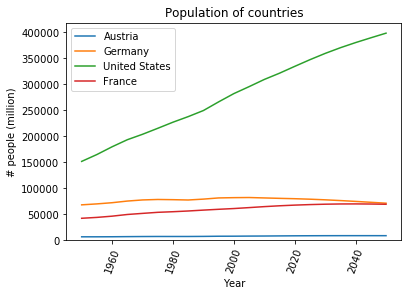

In [10]:
plotCountries = ['Austria', 'Germany', 'United States', 'France']
    
for country in plotCountries:
    row = df.ix[country]
    plt.plot(row.index, row, label=row.name ) 
    
plt.ylim(ymin=0) # start y axis at 0

# rotate labels 70 degree
plt.xticks(rotation=70)
# # put legends best place not to interfere with the plot
plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("# people (million)")
plt.title("Population of countries")

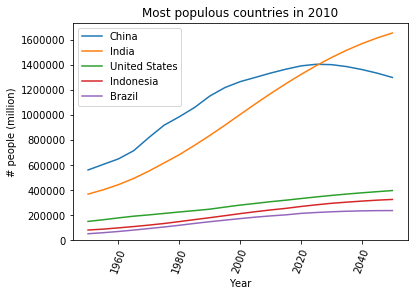

In [11]:
def plot_populous(df, year):
    # sort table depending on data value in year column
    df_by_year = df.sort_values(year, ascending=False)
    for i in range(5):  
        row = df_by_year.ix[i]
        plt.plot(row.index, row, label=row.name ) 
            
    plt.ylim(ymin=0)
    
    plt.xticks(rotation=70)
    plt.legend(loc='best')
    plt.xlabel("Year")
    plt.ylabel("# people (million)")
    plt.title("Most populous countries in %d" % year)

plot_populous(df, 2010)
#plot_populous(df, 2050)